In [5]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [6]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor


# maze = gym.make('corridor-100-v0')
maze = gym.make('corridor-40-v0')
# maze = gym.make('corridor-20-v0')

maze.reset()
maze.render()


[............................X..........$]


In [8]:
from lcs.agents.xcs import XCS, Configuration


# TODO: fix it.
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position)) and cl.action == 1 and cl.is_general()]):
            nr_correct += 1
        position += 1
    return nr_correct / position


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': sum(cl.numerosity for cl in xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment)
    }


cfg = Configuration(theta_mna=2,
                    metrics_trial_frequency=10,
                    user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 20000, False)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 200, 'reward': 1.2636230201407294e-40, 'population': 126, 'knowledge': 0.25}


INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 6, 'reward': 100.0, 'population': 199, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 4000, 'steps_in_trial': 70, 'reward': 100.0194902622797, 'population': 200, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 6000, 'steps_in_trial': 200, 'reward': 2.225919734697822e-72, 'population': 200, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 8000, 'steps_in_trial': 74, 'reward': 100.0, 'population': 197, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 10000, 'steps_in_trial': 9, 'reward': 100.0, 'population': 194, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 12000, 'steps_in_trial': 200, 'reward': 1.2041288822738231e-191, 'population': 194, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 14000, 'steps_in_trial': 200, 'reward': 6.739531551691838e-195, 'population': 194, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 16000, 'steps_in_trial': 37, 'reward': 100.0, 'population': 194, 'knowledge': 0.0}


INFO:lcs.agents.Agent:{'trial': 18000, 'steps_in_trial': 200, 'reward': 1.4488040227814324e-194, 'population': 194, 'knowledge': 0.0}


Text(0, 0.5, 'steps for solution')

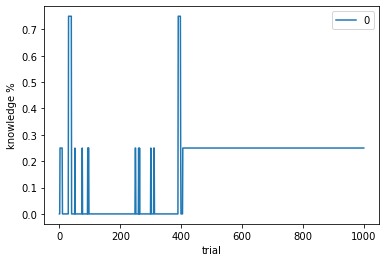

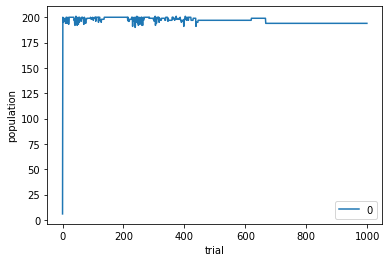

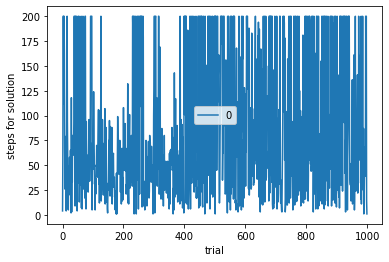

In [ ]:
import pandas as pd

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")


df = pd.DataFrame(metric["population"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")





In [ ]:
# Based on my experiment. Following results should be repeatable after re-running of this file.

# Observation:
# Population raises to max value at the beginning of experiment
# Steps are random
# Knowledge reaches level close to max immediately

# Conclusion:
# Corridor is primary a test of Algorithm running.
# It does not provide sufficient data to determine proper function of algorithm
# Population almost immediately reaches default max population.
# Algorithm will not delete Classifiers until it will reach max population, which it does.
# Starting position of corridor is random therefore steps should have not resulted in any pattern 
# Knowledge follows the population. 

# Proposed Solution:
# Continue testing the XCS in other environment
# Lower metrics_trial_frequency to better see the changes in population

# Alternative Solution, I do not plan to implement it:
# normalize the steps by dividing steps_in_trial by distance to solution depending on starting position.
# requires taking note of starting position by XCS itself beyond TrialMetrics, therefore discarded as solution.


